<a href="https://colab.research.google.com/github/emgrande/Eh_Wavelet/blob/main/Eh_Wavelet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Below are the codes to replicate the analysis of the manuscript, "Terrestrial groundwater table mediates redox potential of salt marsh sediments," submitted for publication in Geophysical Research Letters



## Install and run the necessary libraries

Notice that depending on the user's internet connection, this can take several minutes

In [ ]:
install.packages("'googlesheets4'") #to read google sheets in R
library(googlesheets4)

In [ ]:
install.packages('biwavelet') #to perform wavelet transform
library(biwavelet)

In [ ]:
install.packages("DescTools") #To perform mutual information and entropy analysis
library(DescTools)

In [ ]:
install.packages("pracma") # to detrend the data
library(pracma)
library(tidyverse)

## Load the data

### These data sets are hosted in public repositories:

*   Guimond, J. (2019). St. Jones Data Compilation 2017, HydroShare, https://doi.org/10.4211/hs.8f0b5599b871457ebb47f0bac898f156.
*   Grande, Emilio, Arora, Bhavna, and Zimmer, Margaret. Subsurface redox potential and water level at the Elkhorn Slough NERR. United States: N. p., 2022. Web. doi:10.15485/1846282.
*   Grande, Emilio, Zimmer, Margaret, Seybold, Erin, and Tatariw, Corianne. Modeled sub-hourly nitrate concentrations in subsurface water across a salt marsh system in Elkhorn Slough, California. United States: N. p., 2023. Web. doi:10.15485/1987518.
*   Grande, Emilio, Visser, Ate, Zimmer, Margaret, Visser, Ate, Oerter, Erik, and Zimmer, Margaret. Stable water isotopes and tritium data from porewater at Elkhorn Slough. United States: N. p., 2023. Web. doi:10.15485/1970526.



In [12]:
docID = '1gq6EoCk1sghoReU-iktblw0I9_K-c2TzFonNPdx8TmU'
sheetID = '178074392'
options(warn=-1)
elkhorn = read_sheet(paste0('https://docs.google.com/spreadsheets/d/',
                         docID,
                         '/export?gid=',
                         sheetID))


✔ Reading from Elkhorn_Eh.

✔ Range Elkhorn_Eh.



In [13]:
head(elkhorn)

Date.Time,Lower Marsh_50cm (mV),Lower Marsh_30cm (mV),Lower Marsh_10cm (mV),Middle Marsh_50cm (mV),Middle Marsh_30cm (mV),Middle Marsh_10cm (mV),Upper Marsh_50cm (mV),Upper Marsh_30cm (mV),Upper Marsh_10cm (mV),⋯,p_meteor,ET,precip,TGWL,WL_n1,WTemp_N1,WL_n2,WTemp_N2,WL_n3,WTemp_N3
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-03-01 08:00:00,-132.5962,-194.8364,-139.9677,-170.3183,-231.1510,-169.5022,-77.55572,-89.40897,-99.59413,⋯,0,0.02,0,2.632312,1.587533,11.91467,1.698408,12.09425,1.696825,12.10367
2020-03-01 09:00:00,-137.2095,-195.0980,-141.3355,-171.3461,-231.3930,-170.3068,-81.67613,-93.13880,-103.28347,⋯,0,0.13,0,2.632696,1.587492,11.91750,1.698358,12.09792,1.696708,12.10800
2020-03-01 10:00:00,-140.1528,-195.7083,-142.7968,-172.0692,-231.5866,-170.8511,-87.24480,-98.82222,-109.09962,⋯,0,0.17,0,2.633021,1.587508,11.92058,1.698317,12.09975,1.696708,12.11258
2020-03-01 11:00:00,-142.3663,-196.1212,-143.6511,-172.4305,-231.7284,-171.1096,-89.11692,-100.96702,-111.46771,⋯,0,0.17,0,2.633358,1.587417,11.92350,1.698408,12.10483,1.697033,12.11708
2020-03-01 12:00:00,-144.2834,-196.5122,-144.1693,-172.6407,-231.8102,-171.1452,-89.70657,-101.82232,-112.60967,⋯,0,0.18,0,2.633798,1.586758,11.92658,1.698583,12.10808,1.697858,12.12133
2020-03-01 13:00:00,-144.8008,-196.6774,-144.1363,-172.6183,-231.8393,-170.9975,-89.97855,-101.91725,-112.97034,⋯,0,0.22,0,2.634125,1.586183,11.92983,1.698692,12.11133,1.698458,12.12592


In [15]:
docID = '14MRtOKYdcWv-8JQKj5l_gScpQwfxSKCDdLTW3G4wr2k'
sheetID = '0'

st_jones <- read_sheet(paste0('https://docs.google.com/spreadsheets/d/',
                              docID,
                              '/export?gid=',
                              sheetID))



✔ Reading from Tidal_Near_Creek.

✔ Range Sheet1.



In [16]:
head(st_jones)

Date.Time,mV10,mV13,mV22,mV35,mV50,mV60,mV75,mV85,mV100
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-03-01 00:00:00,149.175,119.175,-200.600,-177.875,-196.150,-188.875,-300.700,-225.90,-227.300
2017-03-01 01:00:00,143.825,101.325,-200.500,-178.175,-196.625,-188.550,-300.700,-225.60,-227.450
2017-03-01 02:00:00,140.725,144.175,-200.500,-178.200,-196.600,-189.400,-300.700,-225.45,-227.525
2017-03-01 03:00:00,147.650,146.300,-201.475,-179.800,-196.800,-187.375,-300.700,-225.60,-227.375
2017-03-01 04:00:00,147.550,147.750,-201.025,-180.725,-196.900,-188.050,-300.475,-225.60,-227.450
2017-03-01 05:00:00,148.900,150.575,-200.850,-181.475,-197.000,-181.975,-300.325,-225.60,-227.300


## 1- continuous wavelet transform

Wavelet transform (CWT) is one of the most commonly used time-frequency analysis techniques for studying multiscale, nonstationary processes over spatial and temporal scales. CWT is obtained by decomposing the data $D(t)$ with a wavelet function $\Psi(t)$ and creating wavelet coefficients $W$ that designate the relationship amongst the wavelet function and the data:

$W_D(a,b)= \int_{-\infty}^{\infty}\Psi_{a,b}^*(t)D(t)dt$

where $t$ is time, $*$ is the complex conjugate of the wavelet function, illustrated by:

$\Psi_{a,b}^*(t)=\frac{1}{\sqrt{a}}\Psi(\frac{t-b}{a}), a>0, -\infty <b < \infty $

$a$ is the scale parameter that determines the dilation or contraction, and $b$ is the shift parameter that dictates the location of the wavelet. The flexibility of the wavelet to be stretched and translated in both time and frequency domains helps identify patterns across different time scales.

In [18]:
# Write a function to normalize the time series
normalize <- function(data){
  variance = var(data, na.rm = TRUE)
  data = (data-mean(data))/sqrt(variance)
  return(data)
}

In [25]:
#create the time series to be analyzed. In this example, the 50 cm depth in the lower marsh position. Notice that we detrend and normalize the data, and make the time column into numneric. We will reconstruct the periods in a later steps
mV <- data.frame(x = as.numeric(elkhorn$Date.Time), y = ts(detrend(normalize(elkhorn$`Lower Marsh_50cm (mV)`))))

#Run the wavelet transform for the time series.
wtc.mV50 <- wt(mV, dt = 1,mother = "morlet",sig.level = 0.95, arima.method = "CSS") #this is for Elkhorn SLough
#reconstruct the period, scale, etc. (We need this step because we made the time-steps numeric earlier)
wtc.mV50$scale <- wtc.mV50$scale/4096
wtc.mV50$period <- wtc.mV50$period/4096
wtc.mV50$coi <- wtc.mV50$coi/4096

#Calculate wavelet transform for the example in the st_jones site
mV <- data.frame(x = as.numeric(st_jones$Date.Time), y = ts(detrend(normalize(st_jones$mV100))))
wtc.mV100 <- wt(mV, dt = 1,mother = "morlet",sig.level = 0.95, arima.method = "CSS")
wtc.mV100$scale <- wtc.mV100$scale/4096
wtc.mV100$period <- wtc.mV100$period/4096
wtc.mV100$coi <- wtc.mV100$coi/4096

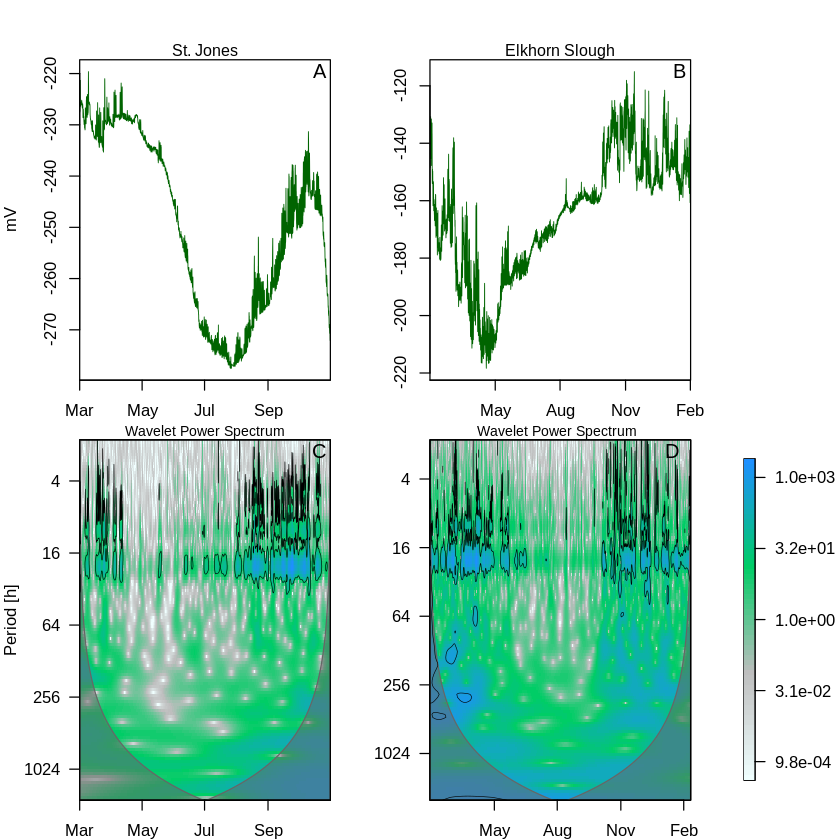

In [26]:
#PLot the data Results
#set the layout
par(mfrow = c(2,2),oma = c(0, 0, 0, 1))

#plot time series for St. Jones
par(mar = c(2, 4, 3, 4) )
plot(st_jones$Date.Time, st_jones$mV100, type = "l",
     xaxt = "n", xlab = "", xaxs = "i", ylab = "mV", lwd = 0.7,
     col = "darkgreen"
     #,ylim = c(-275,-180)
)
t <- st_jones$Date.Time

xaxis <- seq(min(t), max(t), length.out = 5)
xaxis <- round_date(xaxis, unit = "day")
xaxis1 <- month(xaxis, label = T, abbr = T)
axis(1, at = xaxis, labels = paste0(xaxis1))

mtext("St. Jones", side = 3, cex = 0.8, bg = "white")
mtext("A", 3, line = -1.1, adj = 0.98)

# Time series for ES
par(mar = c(2, 1, 3, 6.5) )
plot(elkhorn$Date.Time, elkhorn$`Lower Marsh_50cm (mV)`, type = "l",
     xaxt = "n", xlab = "", xaxs = "i", ylab = "mV", lwd = 0.7,
     col = "darkgreen"
     #,ylim = c(-275,-180)
)
t <- elkhorn$Date.Time

xaxis_e <- seq(min(t), max(t), length.out = 5)
xaxis_e <- round_date(xaxis_e, unit = "day")
xaxis1_e <- month(xaxis_e, label = T, abbr = T)
axis(1, at = xaxis_e, labels = paste0(xaxis1_e))

mtext("Elkhorn Slough", side = 3, cex = 0.8, bg = "white")
mtext("B", 3, line = -1.1, adj = 0.98)

#Wavelet st_Jones
col <- c("azure", "gray","springgreen3", "dodgerblue")

par(mar = c(2, 4, 1, 4) )
par(las= 2)
plot.biwavelet(wtc.mV100, plot.phase = F,
               lty.coi = 1, col.coi = "grey40", lwd.coi = 1,
               lwd.sig = 0.5, ylab = "Period [h]", xlab = "",
               xaxt = "n",
               plot.cb = F, fill.cols = col)
par(las= 1)
axis(1, at = xaxis, labels = paste0(xaxis1))
mtext("Wavelet Power Spectrum", side = 3, cex = 0.7, bg = "white")
mtext("C", 3, line = -1.1, adj = 0.98)


#Wavelet Elkhorn
par(mar = c(2, 1, 1, 6.5) )
par(las= 2)
plot.biwavelet(wtc.mV50, plot.phase = F, lty.coi = 1, col.coi = "grey40", lwd.coi = 1,
               lwd.sig = 0.5, ylab = "Period [h]", xlab = "", xaxt = "n",
               plot.cb = T, fill.cols = col)
par(las= 1)
axis(1, at = xaxis_e, labels = paste0(xaxis1_e))

mtext("Wavelet Power Spectrum", side = 3, cex = 0.7, bg = "white")
mtext("D", 3, line = -1.1, adj = 0.98)


## 2- Mutual Informtion Analysis

The mutual information ($MI$) of two random variables is a measure of the mutual dependence between the two variables. Mutual information defines how different the joint distribution of the two variables $(X, Y)$ is from the product of the marginal distributions of $X$ and $Y$:

$I(X;Y) = D_{KL}(P_{(X,Y)}||P_x \bigotimes P_y)$

Below, we calculate $MI$ between $Eh$ and several hydro-climatic variables recorded at the cite over the same period and normalize by the square root of each signal's Entropy $(H)$:
$\frac{I(X;Y)}{ \sqrt{H(X* H(Y)}}$

and $H(X) = \sum_{i=1}^n{P(x_i)logP(x_i)}$

In [27]:
#first, we need to load the data from St. Jones (The data set used in figure 1 only contains Eh). To keep all the files, we will use a different name, "tidal," instead of st_jones
docID = "1pogLcdtPCzvb-0t6NdrHKSzLQnJKNGqOIg9qtJ2pYaI"
sheetID = '0'

tial = read_sheet(paste0('https://docs.google.com/spreadsheets/d/',
                         docID,
                         '/export?gid=',
                         sheetID))


Auto-refreshing stale OAuth token.

✔ Reading from MI_Tidal.

✔ Range Sheet1.



In [29]:
#run the MI, and save the results in a data frame. We show examples from the shallowest and deepest probe at each site
list2env(tidal, envir=.GlobalEnv)
Mut.Inf_tidal.mv10 <- data.frame(Parameter = c("Precipitation","Relative Humidity","Total PAR","Air Temperature",
                                               "Subsurface WL", "Terrestrial GW"),
                                 Mutual.Inf = c(MutInf(mV10,precip)/sqrt(Entropy(mV10)*Entropy(precip)),
                                                MutInf(mV10,RH)/sqrt(Entropy(mV10)*Entropy(RH)),
                                                MutInf(mV10,tot.PAR)/sqrt(Entropy(mV10)*Entropy(tot.PAR)),
                                                MutInf(mV10,A.Temp)/sqrt(Entropy(mV10)*Entropy(A.Temp)),
                                                MutInf(mV10,W2)/sqrt(Entropy(mV10)*Entropy(W2)),
                                                MutInf(mV10,TGWL)/sqrt(Entropy(mV10)*Entropy(TGWL))))

Mut.Inf_tidal.mv100 <- data.frame(Parameter = c("Precipitation","Relative Humidity","Total PAR","Air Temperature",
                                                "Subsurface WL", "Terrestrial GW"),
                                  Mutual.Inf = c(MutInf(mV100,precip)/sqrt(Entropy(mV100)*Entropy(precip)),
                                                 MutInf(mV100,RH)/sqrt(Entropy(mV100)*Entropy(RH)),
                                                 MutInf(mV100,tot.PAR)/sqrt(Entropy(mV100)*Entropy(tot.PAR)),
                                                 MutInf(mV100,A.Temp)/sqrt(Entropy(mV100)*Entropy(A.Temp)),
                                                 MutInf(mV100,W2)/sqrt(Entropy(mV100)*Entropy(W2)),
                                                 MutInf(mV100,TGWL)/sqrt(Entropy(mV100)*Entropy(TGWL))))

<environment: R_GlobalEnv>

In [30]:
#Repeat the process for Elkhorn Slough (Notice that for ES, we can use the original file, which contains all the data together)
list2env(elkhorn, envir=.GlobalEnv)
Mut.Inf_Low.mv10 <- data.frame(Parameter = c("Precipitation","Relative Humidity","Total PAR","Air Temperature",
                                               "Subsurface WL", "Terrestrial GW"),
                                 Mutual.Inf = c(MutInf(`Lower Marsh_10cm (mV)`,precip)/sqrt(Entropy(`Lower Marsh_10cm (mV)`)*Entropy(precip)),
                                                MutInf(`Lower Marsh_10cm (mV)`,RH)/sqrt(Entropy(`Lower Marsh_10cm (mV)`)*Entropy(RH)),
                                                MutInf(`Lower Marsh_10cm (mV)`,tot.PAR)/sqrt(Entropy(`Lower Marsh_10cm (mV)`)*Entropy(tot.PAR)),
                                                MutInf(`Lower Marsh_10cm (mV)`,A.Temp)/sqrt(Entropy(`Lower Marsh_10cm (mV)`)*Entropy(A.Temp)),
                                                MutInf(`Lower Marsh_10cm (mV)`,WL_n1)/sqrt(Entropy(`Lower Marsh_10cm (mV)`)*Entropy(WL_n1)),
                                                MutInf(`Lower Marsh_10cm (mV)`,TGWL)/sqrt(Entropy(`Lower Marsh_10cm (mV)`)*Entropy(TGWL))))

Mut.Inf_Low.mv50 <- data.frame(Parameter = c("Precipitation","Relative Humidity","Total PAR","Air Temperature",
                                               "Subsurface WL", "Terrestrial GW"),
                                 Mutual.Inf = c(MutInf(`Lower Marsh_50cm (mV)`,precip)/sqrt(Entropy(`Lower Marsh_50cm (mV)`)*Entropy(precip)),
                                                MutInf(`Lower Marsh_50cm (mV)`,RH)/sqrt(Entropy(`Lower Marsh_50cm (mV)`)*Entropy(RH)),
                                                MutInf(`Lower Marsh_50cm (mV)`,tot.PAR)/sqrt(Entropy(`Lower Marsh_50cm (mV)`)*Entropy(tot.PAR)),
                                                MutInf(`Lower Marsh_50cm (mV)`,A.Temp)/sqrt(Entropy(`Lower Marsh_50cm (mV)`)*Entropy(A.Temp)),
                                                MutInf(`Lower Marsh_50cm (mV)`,WL_n1)/sqrt(Entropy(`Lower Marsh_50cm (mV)`)*Entropy(WL_n1)),
                                                MutInf(`Lower Marsh_50cm (mV)`,TGWL)/sqrt(Entropy(`Lower Marsh_50cm (mV)`)*Entropy(TGWL))))

<environment: R_GlobalEnv>

null device 
          1

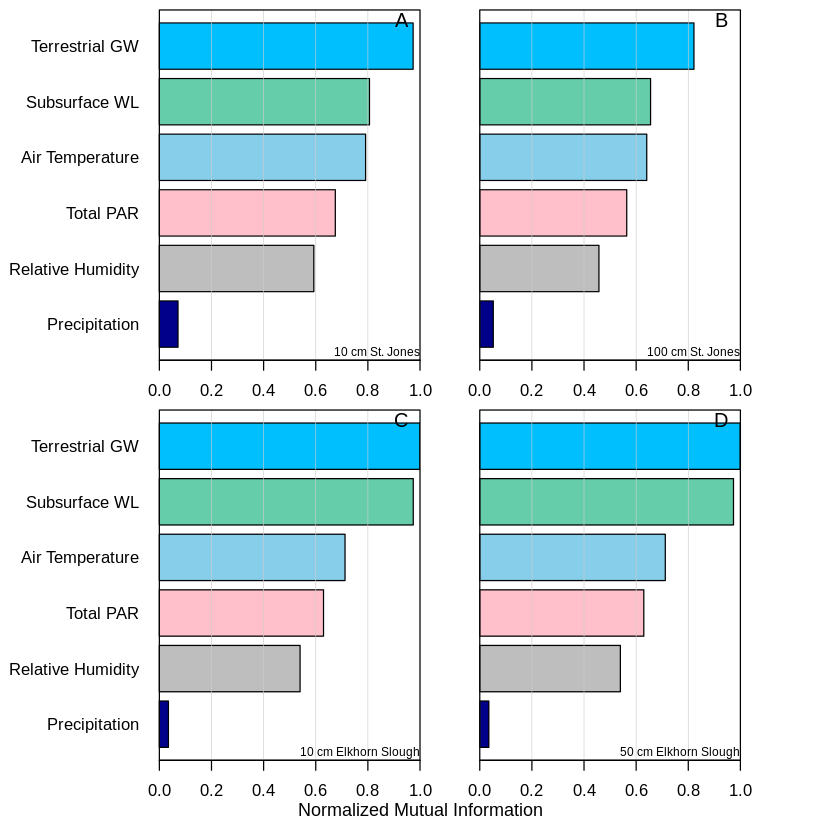

In [31]:
#PLot the results

par(mar = c(2,8,0.5,0))
par(mfrow = c(2,2),oma= c(2,0,0,0))
cols <- c('deepskyblue', "aquamarine3",'skyblue','pink', 'grey', 'darkblue')[6:1]

barplot(Mut.Inf_tidal.mv10$Mutual.Inf, col = cols,
        names.arg= Mut.Inf_tidal.mv10$Parameter, horiz=T, las=1, xlim = c(0,1))
abline(v=c(0,0.2,0.4,0.6,0.8), col = "grey80", lwd = 0.5)

mtext("10 cm St. Jones", side = 1, line = -1, adj = 1, cex = 0.6)
mtext("A", side = 3, line = -1.05, adj = 0.95)

box()

par(mar = c(2,3,0.5,5))
barplot(Mut.Inf_tidal.mv100$Mutual.Inf, col = cols, yaxt = "n",
        names.arg= Mut.Inf_tidal.mv100$Parameter, horiz=T, las=1, xlim = c(0,1))
abline(v=c(0,0.2,0.4,0.6,0.8), col = "grey80", lwd = 0.5)
mtext("100 cm St. Jones", side = 1, line = -1, adj = 1, cex = 0.6)
mtext("B", side = 3, line = -1.05, adj = 0.95)
box()


par(mar = c(2,8,0.5,0))

barplot(Mut.Inf_Low.mv10$Mutual.Inf, col = cols,
        names.arg= Mut.Inf_Low.mv10$Parameter, horiz=T, las=1, xlim = c(0,1))
abline(v=c(0,0.2,0.4,0.6,0.8), col = "grey80", lwd = 0.5)
#title(xlab="Normalized Mutual Information", cex = 0.9)
mtext("10 cm Elkhorn Slough", side = 1, line = -1, adj = 1, cex = 0.6)
mtext("C", side = 3, line = -1.05, adj = 0.95)
box()

par(mar = c(2,3,0.5,5))
barplot(Mut.Inf_Low.mv50$Mutual.Inf, col = cols, yaxt = "n",
        names.arg= Mut.Inf_Low.mv50$Parameter, horiz=T, las=1, xlim = c(0,1))
abline(v=c(0,0.2,0.4,0.6,0.8), col = "grey80", lwd = 0.5)

mtext("50 cm Elkhorn Slough", side = 1, line = -1, adj = 1, cex = 0.6)
mtext("D", side = 3, line = -1.05, adj = 0.95)
box()

mtext("Normalized Mutual Information", side = 1,cex = 0.9, outer = T, line = 0)

## 3 - Wavelet Coherence

Wavelet coherence analysis can explain the relationship of two time series in the time-frequency domain. The correlation between the wavelet power of two variables $(D1, D2)$ can be quantified through wavelet coherence analysis:

$p_{D1,D2}(a,b) = W_{D1}(a,b)W_{D2}^*(a,b)$


The wavelet coherence may be decomposed into modulus $p_{D1,D2}(a,b)$ and phase $\Phi_{D1,D2}(a,b)$ as:

$p_{D1,D2}(a,b) = |p_{D1,D2}(a,b)|e^{i\Phi_{D1,D2}(a,b)}$

Where the modulus quantifies the power and the phase describes the lag in time between $D1$ and $D2$. We used wavelet coherence to study how Eh and other nonstationary variables, specifically marsh subsurface water level and terrestrial groundwater level, varied in time.

In [32]:
#We will start with St_Jones
#call the data
docID <- '1pogLcdtPCzvb-0t6NdrHKSzLQnJKNGqOIg9qtJ2pYaI'
sheetID <- '0'
st_jones <- read_sheet(paste0('https://docs.google.com/spreadsheets/d/',
                          docID,
                          '/export?gid=',
                          sheetID))

✔ Reading from MI_Tidal.

✔ Range Sheet1.



In [33]:
#Define all the time series
tgwl <- data.frame(x = as.numeric(st_jones$Date.Time), y = ts(normalize(st_jones$TGWL))) #terrestrial groundwater level
wl <- data.frame(x = as.numeric(st_jones$Date.Time), y = ts(normalize(st_jones$W2))) #marsh subsurface water level
mV <- data.frame(x = as.numeric(st_jones$Date.Time), y = ts(detrend(normalize(st_jones$mV100)))) #Eh at 100 cm


In [34]:
#wavelet coherence Eh and TGWL
wtc.mV100_tgwl <- wtc(d1 = tgwl, d2 = mV, mother = "morlet",sig.level = 0.95
                      ,nrands = 100) #for the figures in the paper, we used Monte Carlo 300 randomisations, here we used 100 for faster processing
wtc.mV100_tgwl$scale <- wtc.mV100_tgwl$scale/4096
wtc.mV100_tgwl$period <- wtc.mV100_tgwl$period/4096
wtc.mV100_tgwl$coi <- wtc.mV100_tgwl$coi/4096

  |======================================================================| 100%


In [35]:
#Wavelet coherence Eh and marsh subsurface WL
wtc.mV100_wl <- wtc(d1=wl,d2=mV,mother = "morlet",sig.level = 0.95
                      ,nrands = 100) #we used Monte Carlo 300 randomizations for the paper's figure
wtc.mV100_wl$scale <- wtc.mV100_wl$scale/4096
wtc.mV100_wl$period <- wtc.mV100_wl$period/4096
wtc.mV100_wl$coi <- wtc.mV100_wl$coi/4096


  |======================================================================| 100%


In [37]:
#Elkhorn Slough
#define the tie series
tgwl <- data.frame(x = as.numeric(elkhorn$Date.Time), y = ts(normalize(elkhorn$TGWL)))
wl <- data.frame(x = as.numeric(elkhorn$Date.Time), y = ts(normalize(elkhorn$WL_n3)))
mV <- data.frame(x = as.numeric(elkhorn$Date.Time), y = ts(detrend(normalize(elkhorn$`Lower Marsh_50cm (mV)`))))


In [38]:
#wavelet coherence Eh and TGWL
wtc.mV50_tgwl <- wtc(d1 = tgwl, d2 = mV, mother = "morlet",sig.level = 0.95
                      ,nrands = 100)#we used Monte Carlo 300 randomizations for the paper's figure
wtc.mV50_tgwl$scale <- wtc.mV50_tgwl$scale/4096
wtc.mV50_tgwl$period <- wtc.mV50_tgwl$period/4096
wtc.mV50_tgwl$coi <- wtc.mV50_tgwl$coi/4096


  |======================================================================| 100%


In [39]:
wtc.mV50_wl <- wtc(d1=wl,d2=mV,mother = "morlet",sig.level = 0.95
                      ,nrands = 100)#we used Monte Carlo 300 randomizations for the paper's figure
wtc.mV50_wl$scale <- wtc.mV50_wl$scale/4096
wtc.mV50_wl$period <- wtc.mV50_wl$period/4096
wtc.mV50_wl$coi <- wtc.mV50_wl$coi/4096


  |======================================================================| 100%


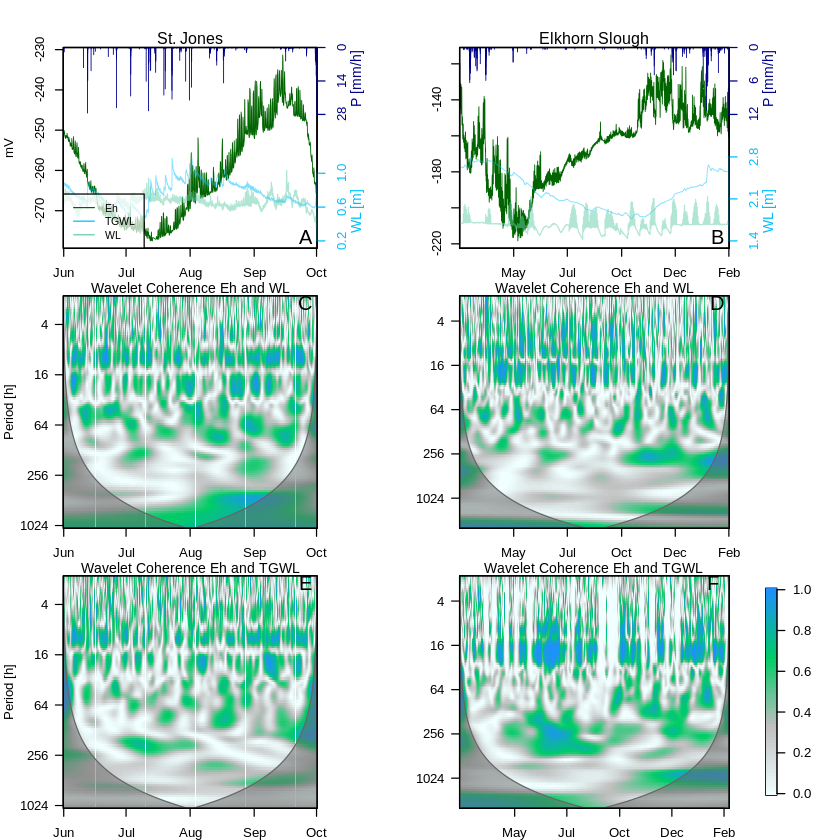

In [40]:
#Plot the results
#set the layout
par(mfrow = c(3,2),oma = c(0, 0, 0, 1))

#plot time series for St. Jones
par(mar = c(2, 4, 3, 6) )
plot(st_jones$Date.Time, st_jones$mV100, type = "l",
     xaxt = "n", xlab = "", xaxs = "i", ylab = "mV", lwd = 0.7,
     col = "darkgreen"
     #,ylim = c(-275,-180)
)
t <- st_jones$Date.Time

xaxis <- seq(min(t), max(t), length.out = 5)
xaxis <- round_date(xaxis, unit = "day")
xaxis1 <- month(xaxis, label = T, abbr = T)
axis(1, at = xaxis, labels = paste0(xaxis1))

mtext("St. Jones", side = 3, cex = 0.8, bg = "white")

par(new = T)
plot(t, st_jones$TGWL, type = "l",
     xaxt = "n", yaxt = "n",xlab = "", xaxs = "i", ylab = "", lwd = 0.7,
     col = alpha(col = "deepskyblue", 0.5),
     ylim = c(0.2, 1.2*ceiling(max(st_jones$TGWL, na.rm = T))))

axis(4, at = seq(0.2, 1,length.out = 3), col = "deepskyblue", col.ticks = "deepskyblue",
     col.axis = "deepskyblue")
lines(t,st_jones$W2, col=alpha("aquamarine3", 0.5))

legend("bottomleft", legend =c("Eh", "TGWL", "WL"),
       col = c("darkgreen",  "deepskyblue", "aquamarine3"),
       lty = 1, cex = 0.8, bg = alpha("white", 0.7))
mtext("WL [m]", 4, line = 2, cex = 0.7, adj = 0.1, col = "deepskyblue")
#
#
par(new=T)
plot(t, st_jones$precip, type = "h",
     xaxt = "n", yaxt = "n",xlab = "", xaxs = "i", ylab = "", lwd = 0.7,
     col = "darkblue", yaxs = "i",
     ylim = c(3*ceiling(max(st_jones$precip, na.rm = T)),0))
axis(4, at = seq(28, 0,length.out = 3), col = "darkblue", col.ticks = "darkblue",
     col.axis = "darkblue")
mtext("P [mm/h]", 4, line = 2, cex = 0.7, adj = 0.98, col = "darkblue")
mtext("A", 1, line = -1.1, adj = 0.98)

# Time series for ES
par(mar = c(2, 3, 3, 6) )
plot(elkhorn$Date.Time, elkhorn$`Lower Marsh_50cm (mV)`, type = "l",
     xaxt = "n", xlab = "", xaxs = "i", ylab = "mV", lwd = 0.7,
     col = "darkgreen"
     #,ylim = c(-275,-180)
)
t <- elkhorn$Date.Time

xaxis_e <- seq(min(t), max(t), length.out = 6)
xaxis_e <- round_date(xaxis_e, unit = "day")
xaxis1_e <- month(xaxis_e, label = T, abbr = T)
axis(1, at = xaxis_e, labels = paste0(xaxis1_e))

mtext("Elkhorn Slough", side = 3, cex = 0.8, bg = "white")


par(new = T)
plot(t, elkhorn$TGWL, type = "l",
     xaxt = "n", yaxt = "n",xlab = "", xaxs = "i", ylab = "", lwd = 0.7,
     col = alpha(col = "deepskyblue", 0.5),
     ylim = c(1.4, 4.5))

axis(4, at = seq(1.4, 2.8,length.out = 3), col = "deepskyblue", col.ticks = "deepskyblue",
     col.axis = "deepskyblue")

lines(elkhorn$Date.Time,elkhorn$WL_n3, col = alpha("aquamarine3", 0.5))


# legend("bottomleft", legend =c("Eh", "TGWL", "WL"),
#        col = c("darkgreen",  "deepskyblue", "aquamarine3"),
#        lty = 1, cex = 0.7)
mtext("WL [m]", 4, line = 2, cex = 0.7, adj = 0.1, col = "deepskyblue")
#
#
par(new=T)
plot(t, elkhorn$precip, type = "h",
     xaxt = "n", yaxt = "n",xlab = "", xaxs = "i", ylab = "", lwd = 0.7,
     col = "darkblue", yaxs = "i",
     ylim = c(3*ceiling(max(elkhorn$precip, na.rm = T)),0))
axis(4, at = seq(12, 0,length.out = 3), col = "darkblue", col.ticks = "darkblue",
     col.axis = "darkblue")
mtext("P [mm/h]", 4, line = 2, cex = 0.7, adj = 0.98, col = "darkblue")
mtext("B", 1, line = -1.1, adj = 0.98)

#coherence with subsurface WL st_Jones
col <- c("azure", "gray","springgreen3", "dodgerblue")

par(mar = c(2, 4, 1, 6) )
par(las= 2)
plot.biwavelet(wtc.mV100_wl, plot.phase = F,
               lty.coi = 1, col.coi = "grey40", lwd.coi = 1,
               lwd.sig = 0.5, ylab = "Period [h]", xlab = "",
               xaxt = "n",
               plot.cb = F, fill.cols = col)
par(las= 1)
axis(1, at = xaxis, labels = paste0(xaxis1))

mtext("Wavelet Coherence Eh and WL", side = 3, cex = 0.7, bg = "white")
mtext("C", 3, line = -1.1, adj = 0.98)

##coherence with subsurface WL Elkhorn
par(mar = c(2, 3, 1, 6) )
par(las= 2)
plot.biwavelet(wtc.mV50_wl, plot.phase = F, lty.coi = 1, col.coi = "grey40", lwd.coi = 1,
               lwd.sig = 0.5, ylab = "Period [h]", xlab = "", xaxt = "n",
               plot.cb = F, fill.cols = col)
par(las= 1)
axis(1, at = xaxis_e, labels = paste0(xaxis1_e))

mtext("Wavelet Coherence Eh and WL", side = 3, cex = 0.7, bg = "white")
mtext("D", 3, line = -1.1, adj = 0.98)

#Coherence with GW st_jones
par(mar = c(2, 4, 1, 6) )
par(las= 2)
plot.biwavelet(wtc.mV100_tgwl, plot.phase = F, lty.coi = 1, col.coi = "grey40", lwd.coi = 1,
               lwd.sig = 0.5, ylab = "Period [h]", xlab = "", xaxt = "n",
               plot.cb = F, fill.cols = col)

par(las= 1)
axis(1, at = xaxis, labels = paste0(xaxis1))

mtext("Wavelet Coherence Eh and TGWL", side = 3, cex = 0.7, bg = "white")
mtext("E", 3, line = -1.1, adj = 0.98)

#coherence with GW Elkhorn
par(mar = c(2, 3, 1, 6) )
par(las= 2)
plot.biwavelet(wtc.mV50_tgwl, plot.phase = F, lty.coi = 1, col.coi = "grey40", lwd.coi = 1,
               lwd.sig = 0.5, ylab = "Period [h]", xlab = "", xaxt = "n",
               plot.cb = TRUE, fill.cols = col)

par(las= 1)
axis(1, at = xaxis_e, labels = paste0(xaxis1_e))

mtext("Wavelet Coherence Eh and TGWL", side = 3, cex = 0.7, bg = "white")
mtext("F", 3, line = -1.1, adj = 0.98)




